<h4>ChatGPT Internal Product Consistency Analysis</h4>

In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df
from metrics import semantic_overlap
from plots import boxplot

<h4>Dataset: ChatGPT</h4>
<p>We aim to analyze ChatGPT’s internal consistency in product recommendations.
To do this, we ran each query three separate times using the ChatGPT web interface and collected the resulting responses. Then, using the Gemini API, we extracted the products recommended in each response.
As a result, we obtained three lists of recommended products per query, which will be used to assess consistency across runs.</p>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,"[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,"[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,"[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,"[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,"[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,"[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,"[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,"[[ASUS TUF Gaming A14, ASUS Vivobook S14 OLED,..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[There is no one-size-fits-all answer to “the ...,[[https://www.techradar.com/news/wearables/bes...,[[https://www.techadvisor.com/article/723389/b...,"[[Apple Watch Ultra 2, Apple Watch Series 10, ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[“Best” depends on what matters most to you (f...,[[https://www.techradar.com/news/wearables/bes...,"[[https://www.youtube.com/watch?v=3xgvATlp6fs,...","[[Apple Watch Ultra 2, Samsung Galaxy Watch 8,..."


<h4>Mean Internal Product Overlap - Implementation & Calculation</h4> 
<p>
To quantify the consistency of ChatGPT’s product recommendations, we compute the Mean Internal Product Overlap (MIPO) for each query. MIPO captures the <em>average semantic similarity</em> among all pairs of product lists generated across the three independent runs of the same query.
</p>

<p>
Formally, let \( C = \{(i, j) \mid 1 \le i < j \le |P_{GPT_q}|\} \) denote the set of all unique pairs of product lists for query \( q \), such that \( |C| = \binom{|P_{GPT_q}|}{2} \). Then, the Mean Internal Product Overlap is defined as                                             
</p> 
    
<p style="text-align:center;">
\( MIPO(q) = \frac{1}{|C|} \sum_{(i, j) \in C} O_{\text{semantic}}(p_{qi}, p_{qj}) \)
</p> 

<p>
where \( O_{\text{semantic}}(p_{qi}, p_{qj}) \) represents the semantic overlap between the product lists \( p_{qi} \) and \( p_{qj} \). Higher MIPO values indicate greater internal consistency in ChatGPT’s product recommendations for that query.
</p>

In [3]:
def calc_mipo(df:pd.DataFrame = chatgpt_df) -> pd.DataFrame:
    from itertools import combinations
    
    mipo_results = []

    for _, row in df.iterrows():
        row_list = row["recommended_products"]
        pairwise_scores = []

        for c in combinations(row_list, 2):
            score = semantic_overlap(c[0], c[1])
            pairwise_scores.append(score)

        semantic_mean = np.mean(pairwise_scores)
        semantic_var = np.var(pairwise_scores, ddof = 0)
        semantic_std = np.sqrt(semantic_var)

        mipo_results.append({
            "query": row["query"],
            "product": row["product"],
            "market_type": row["market_type"],
            "query_level": row["query_level"],
            "mipo_mean": semantic_mean,
            "mipo_var": semantic_var,
            "mipo_std": semantic_std
        })

    return pd.DataFrame(mipo_results)

In [4]:
mipo_df = calc_mipo()
mipo_df

,query,product,market_type,query_level,mipo_mean,mipo_var,mipo_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.740741,0.035665,0.188853
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.791667,0.003472,0.058926
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.875000,0.000000,0.000000
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.583333,0.045139,0.212459
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.359259,0.003813,0.061753
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.125000,0.010417,0.102062
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.333333,0.000000,0.000000
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.291667,0.024306,0.155902
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.791667,0.003472,0.058926
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.708333,0.003472,0.058926


<h4>Mean Internal Product Overlap - Analysis</h4>

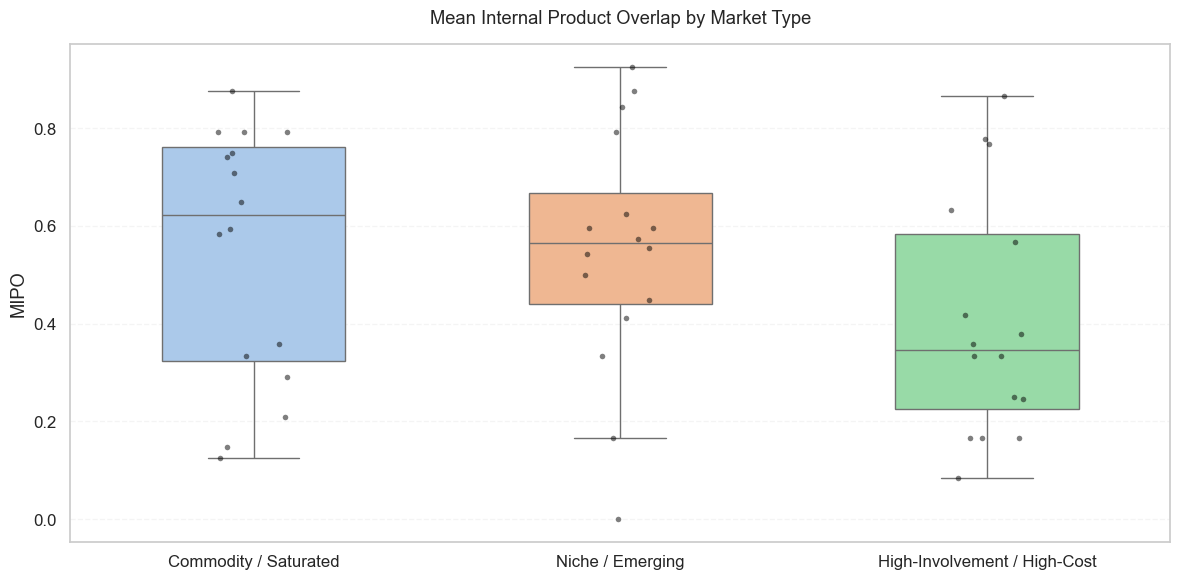

In [7]:
mipo_cs = mipo_df[mipo_df["market_type"] == "Commodity / Saturated"]
mipo_ne = mipo_df[mipo_df["market_type"] == "Niche / Emerging"]
mipo_hh = mipo_df[mipo_df["market_type"] == "High-Involvement / High-Cost"]

plot_df = pd.DataFrame({
    "MIPO": pd.concat([
        mipo_cs["mipo_mean"],
        mipo_ne["mipo_mean"],
        mipo_hh["mipo_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(mipo_cs)
        + ["Niche / Emerging"] * len(mipo_ne)
        + ["High-Involvement / High-Cost"] * len(mipo_hh)
    )
})

fix, ax = boxplot(
    df = plot_df,
    x_col = "Market Type",
    y_col = "MIPO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "Mean Internal Product Overlap by Market Type",
    xlabel = "",
    ylabel = "MIPO"
)

<h4>Interpretation of MIPO by Market Type</h4>
<p>This boxplot compares the Mean Internal Product Overlap (MIPO) across three market categories: Commodity / Saturated, Niche / Emerging, and High-Involvement / High-Cost.</p>

<h5>Commodity / Saturated</h5>
<ul>
  <li>Highest median MIPO, indicating the most consistent overlap in recommendations.</li>
  <li>Variation is moderate to high rather than low; the interquartile range is wide and whiskers extend across much of the scale.</li>
  <li>Standardized products and clearer shared attributes likely drive the generally stronger overlap.</li>
</ul>

<h5>Niche / Emerging</h5>
<ul>
  <li>Mid-range median MIPO with a comparatively compact central spread.</li>
  <li>Consistency is moderate, influenced by evolving terminology and less mature product taxonomies.</li>
  <li>Overall stability sits between the other two categories.</li>
</ul>

<h5>High-Involvement / High-Cost</h5>
<ul>
  <li>Lowest median MIPO, reflecting less overlap in recommended products.</li>
  <li>Substantial variability across samples, consistent with multi-attribute, context-heavy decisions.</li>
  <li>Recommendations are more sensitive to specific user context and trade-offs, reducing overlap.</li>
</ul>

<p>Overall, recommendation consistency tends to decrease as market complexity increases. In more structured and data-rich categories, MIPO is higher and outputs are more repeatable. In complex or subjective domains, MIPO is lower and more variable, indicating context-sensitive recommendations.</p>


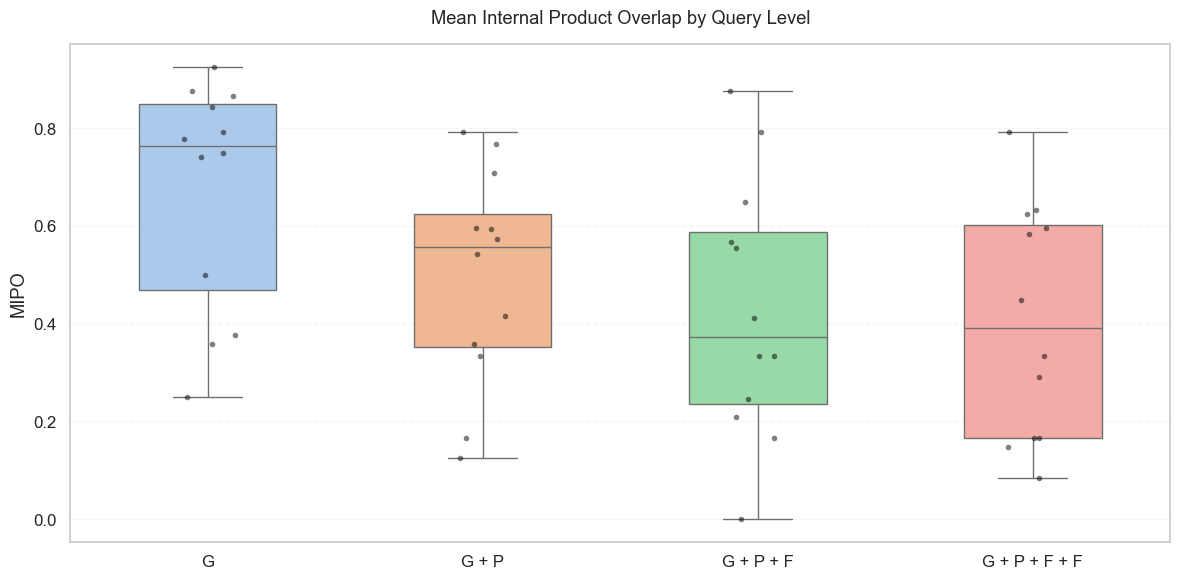

In [9]:
mipo_g = mipo_df[mipo_df["query_level"] == "General"]
mipo_gp = mipo_df[mipo_df["query_level"] == "General & Price"]
mipo_gpf = mipo_df[mipo_df["query_level"] == "General & Price & Feature"]
mipo_gpff = mipo_df[mipo_df["query_level"] == "General & Price & Feature & Feature"]

plot_df = pd.DataFrame({
    "MIPO": pd.concat([
        mipo_g["mipo_mean"],
        mipo_gp["mipo_mean"],
        mipo_gpf["mipo_mean"],
        mipo_gpff["mipo_mean"]
    ], ignore_index=True),
    "Query Level": (
        ["G"] * len(mipo_g)
        + ["G + P"] * len(mipo_gp)
        + ["G + P + F"] * len(mipo_gpf)
        + ["G + P + F + F"] * len(mipo_gpff)
    )
})

fix, ax = boxplot(
    df = plot_df,
    x_col = "Query Level",
    y_col = "MIPO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "Mean Internal Product Overlap by Query Level",
    xlabel = "",
    ylabel = "MIPO"
)

<h4>Interpretation of MIPO by Query Level</h4>
<p>This boxplot shows how the Mean Internal Product Overlap (MIPO) changes as query complexity increases. Each query type progressively adds more constraints: General (G), General + Price (G + P), General + Price + Feature (G + P + F), and General + Price + Feature + Feature (G + P + F + F).</p> <h5>G (General)</h5> 
<ul> 
    <li>Highest median MIPO and smallest spread, indicating highly consistent recommendations across runs.</li> <li>Open-ended queries allow the model to rely on broad semantic similarity, producing stable overlap.</li> 
</ul> 
<h5>G + P (General + Price)</h5> 
<ul> 
    <li>Moderate MIPO with slightly wider variation.</li> 
    <li>Adding a price constraint introduces trade-offs between semantic relevance and numerical filtering, slightly reducing consistency.</li> 
</ul> 
<h5>G + P + F (General + Price + Feature)</h5> 
<ul> 
    <li>Lower median MIPO and broader variability.</li> 
    <li>Incorporating a feature attribute increases query specificity and narrows the product space, creating more variation among runs.</li> 
</ul> 
<h5>G + P + F + F (General + Price + Two Features)</h5> 
<ul>
    <li>Lowest median MIPO and the widest spread.</li> 
    <li>Multiple feature constraints compound filtering effects, reducing overlap as the model tailors results more precisely to detailed conditions.</li> 
</ul> 
<p>Overall, recommendation consistency decreases as query specificity increases. Broader, general prompts yield higher overlap and repeatability, while detailed, multi-constraint queries produce lower MIPO as the model adjusts to finer contextual differences.</p>